# Laboratorio #1

**Autor.** Felipe Urrutia Vargas

## Parte A
Uso de $\texttt{Python}$

### Ejercicio 1

*Ecuaciones diferenciales ordinarias*. Dado el sistema de ecuaciones diferenciales no lineal
\begin{cases}
\dot{x} = 2x − xy, \\
\dot{y}= −y + cos(x),
\end{cases}
con condiciones iniciales $x_0 = 1$ e $y_0 = 5$.

#### a)
Encuentre la solución general del sistema sin considerar condiciones iniciales en $\texttt{Python}$ (use $\texttt{dsolve}$
de $\texttt{sympy}$)

In [1]:
from sympy import *

In [2]:
%%time
t = symbols("t")
x = Function("x")
y = Function("y")

eq = [
    Eq(x(t).diff(t), 2*x(t) - x(t)*y(t)), 
    Eq(y(t).diff(t), -y(t) + cos(x(t)))
]
sol = dsolve(eq, funcs=[x(t), y(t)], t=t)
sol

KeyboardInterrupt: 

#### b)
Resuelva el sistema de forma numérica en el intervalo de tiempo $[0, 5]$ en $\texttt{Python}$ mediante $\texttt{solve_ivp}$ de $\texttt{scipy}$. Grafique las soluciones.

In [5]:
import numpy as np
from scipy.integrate import solve_ivp

In [9]:
def OED_system(t, state):
    x, y = state
    dx = 2*x - y*x
    dy = -y+np.cos(x)
    return [dx, dy]

In [27]:
%%time
icv = [1, 5]
t_span = (0.0, 5.0)
t = np.arange(0.0, 5.0, 0.01)
sol_ivp = solve_ivp(OED_system, t_span, icv)

Wall time: 2 ms


In [41]:
import matplotlib.pyplot as plt

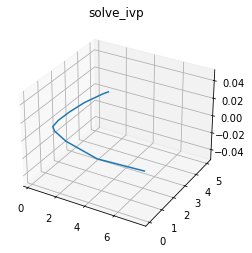

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(sol_ivp.y[0, :],
        sol_ivp.y[1, :])
ax.set_title("solve_ivp")
plt.show()

#### c)
Utilice el applet $\texttt{pyplane}$ (disponible en https://github.com/TUD-RST/pyplane) para dibujar los diagramas de fase del sistema para distintas condiciones iniciales. En particular muestre el mismo punto inicial utilizado antes.

In [1]:
import run_pyplane

C:\Users\felip\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\felip\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\felip\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\felip\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\U

KeyboardInterrupt: 

SystemExit: 0

C:\Users\felip\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


$(x_0, y_0) = (1, 5)$
<img src="figures/e1_c__x_1_y_5_pp.png" />

$(x_0, y_0) = (-1, 5)$
<img src="figures/e1_c__x_-1_y_5_pp.png" />

$(x_0, y_0) = (1, 0.8)$
<img src="figures/e1_c__x_1_y_08_pp.png" />

$(x_0, y_0) = (5, 3)$
<img src="figures/e1_c__x_5_y_3_pp.png" />

### Ejercicio 2

Considere el sistema de control en $\mathbb{R}^2$
$$
\dot{x}(t) = Ax(t) + Bu(t) \quad \text{con} \quad A= \begin{bmatrix} 2 & 2 \\ -5 & 3\end{bmatrix}, \quad B=\begin{bmatrix} 5 \\ 1\end{bmatrix}
$$
con condiciones indiciales $x_0= (0,0)'$. Resuelva el sistema de forma numerica en el intervalo de tiempo $[0,10]$ en $\texttt{Python}$ mediante $\texttt{solver-ivp}$ para los siguientes controles de lazo abierto (*open loop*):
$$
u(t) = 0.2; \quad u(t) = e^t; u(t) = e^{-t}cos(t).
$$
Grafique las soluciones.

In [38]:
def control_system(t, x, u, A, B):
#     print(t, x, u, A, B)
    dx = A @ x + B * u(t)
#     print(dx)
    return dx

In [39]:
A = np.array([
    [2, 2], 
    [-5, 3]
])
B = np.array([
    5,
    1
])

def u1(t):
    return 0.2

def u2(t):
    return np.exp(t)

def u3(t):
    return np.exp(-t)*np.cos(t)

icv = np.array([0, 0])
t_span = (0.0, 10.0)
t = np.arange(t_span[0], t_span[1], 0.01)

In [49]:
%%time
sol_ivp1 = solve_ivp(control_system, t_span, icv, args=[u1, A, B])

Wall time: 5 ms


In [50]:
%%time
sol_ivp2 = solve_ivp(control_system, t_span, icv, args=[u2, A, B])

Wall time: 5 ms


In [51]:
%%time
sol_ivp3 = solve_ivp(control_system, t_span, icv, args=[u3, A, B])

Wall time: 6 ms


In [52]:
def plot_sol(sol, i=1):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot(sol.y[0, :],
            sol.y[1, :])
    ax.set_title(f"solve_ivp: u{i}")
    plt.show()

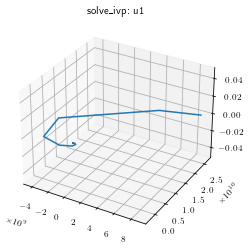

In [53]:
plot_sol(sol_ivp1, i=1)

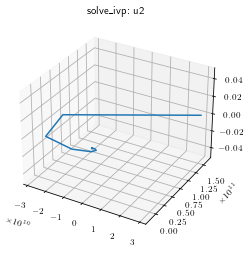

In [54]:
plot_sol(sol_ivp2, i=2)

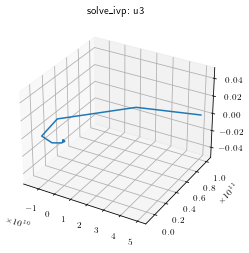

In [55]:
plot_sol(sol_ivp3, i=3)

### Ejercicio 3

*Optimizacion lineal*. Resuelva con $\texttt{Python}$ el siguiente problema de programacion lineal (PL). Utilice para ello $\texttt{linprog}$ de $\texttt{scipy}$ y explore los distintos metodos disponibles.
\begin{cases}
\min &f(x, y, z) = -8x-y-3z\\
\text{s.a.} & -x+y+z \leq 13 \\
& 3x+5y+5z \leq 10 \\
& 9x-5y\leq 20 \\
& x, y, z \geq 0
\end{cases}

In [56]:
from scipy.optimize import linprog

In [57]:
c = np.array([-8, -1, -3])
A = np.array([
    [-1, 1, 1], 
    [3, 5, 5],
    [9, -5, 0]
])
b = np.array([13, 10, 20])
E = None
e = None
bnd = [(0, None) for _ in range(c.shape[0])]

In [63]:
def solve_linprog(A, b, E, e, bnd, method="simplex"):
    opt = linprog(c=c, A_ub=A, b_ub=b,
                      A_eq=E, b_eq=e, bounds=bnd,
                      method=method)
    sol = opt.x
    return sol

In [68]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "simplex")

1.18 ms ± 21.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [69]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "revised simplex")

838 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [70]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "interior-point")

1.98 ms ± 6.88 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [71]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "highs-ipm")

703 µs ± 4.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [72]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "highs-ds")

428 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [73]:
%%timeit
solve_linprog(A, b, E, e, bnd, method = "highs")

424 µs ± 2.08 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [100]:
sol = solve_linprog(A, b, E, e, bnd, method = "highs")
sol

array([2.5, 0.5, 0. ])

### Ejercicio 4

*Optimizacion no lineal*. Un paquete postal (en forma de paralelepípedo rectangular) debe
satisfacer que su altura más el perímetro de su base no puede exceder los 53 cm. Se pretende diseñar un paquete tal que cumpla con esta restricción y que además posea un volumen máximo. Escriba un modelo matemático para este problema y resuélvalo utilizando el comando minimize de scipy.

**Figura 1.e4.** *Paralelepipedo P(h, a, b) de altura h y lados de la base (a, b).*
<img src="figures/e4_m.png" />

Sea $P(h, a, b)$ un paralelepipedo como en la figura, entonces su volumen $V(h, a, b)$ es igual a $abh$. La suma del perimetro de la base más la altura es $2 (a + b) + h$. Con esto, el problema de optimizacion para encontrar $(h, a, b)$ optimos es equivalente a resolver el siguiente problema no lineal:

\begin{cases}
\min & - V(h, a, b) = - abh \\
\text{s.a.} & h + 2(a + b) \leq 53\\
& h, a, b \geq 0
\end{cases}

In [309]:
from scipy.optimize import minimize
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint

In [310]:
fun = lambda x: -np.prod(x)
x0 = np.ones(3)
linear_constraint = LinearConstraint([[1, 2, 2]], [0], [53])
bounds = Bounds(np.zeros(3), np.inf*np.ones(3))

In [311]:
%%time
res = minimize(fun, x0, method='SLSQP', bounds=bounds, constraints=[linear_constraint])
print(res.message)
sol = res.x
sol

Optimization terminated successfully
Wall time: 4 ms


array([17.66664669,  8.83333081,  8.83334585])

### Ejercicio 5

Encuentre los puntos de intersección $(x, y)$ de las siguientes cónicas:

* $2x^2 + y = 1$,
* $(x − 1/2)^2 − 2(y − 1/4)^2 = 1$.

Para esto, utilice el comando $\texttt{fsolve}$ de $\texttt{scipy}$ y grafique.

In [312]:
from scipy.optimize import fsolve

In [346]:
def func(x):
    return [2*(x[0]**2) + x[1]-1,
            (x[0]-0.5)**2-2*((x[1]-0.25)**2)-1
           ]

# Root 1
root = fsolve(func, [0, 0])
print("Root 1:", root, func(root))

# Root 2
root = fsolve(func, [-1, 0])
print("Root 2:", root, func(root))

Root 1: [-0.53273178  0.4323937 ] [3.801403636316536e-13, 1.1888268147686176e-12]
Root 2: [-0.82653389 -0.36631654] [-1.962319196024964e-12, 2.553379729874905e-11]


In [347]:
from sympy import symbols, plot_implicit, Eq

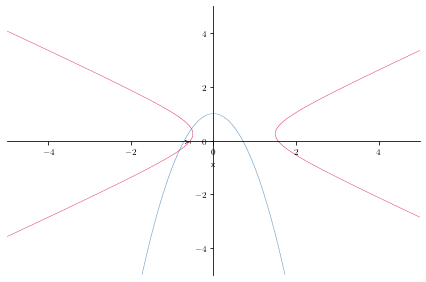

In [348]:
x, y = symbols('x y')
plot1 = plot_implicit(Eq(2*(x**2) + y-1), line_color='steelblue', show=False)
plot2 = plot_implicit(Eq((x-0.5)**2-2*((y-0.25)**2)-1), line_color='crimson', show=False)
plot1.append(plot2[0])
plot1.show()

## Parte B
Control Optimo: Uso de $\texttt{BOCOP}$

$\texttt{BOCOP}$ es un programa open-source diseñado para resolver problemas de control óptimo tipo Mayer a tiempo final fijo o libre y con restricciones de control y estado. Para instalar el solver de control óptimo BOCOP ver el archivo “bocop.pdf”. Encontrará un manual más detallado en www.bocop.org. BOCOP puede resolver problemas de la forma siguiente

$$
(M) \begin{cases}
\min_{u(\cdot)} & J(t_0, y(t_0), t_f, y(t_f))  &(\textit{Criterio})\\
& \dot{y}(t) = f(y(t), u(t)), \forall t \in [t_0, t_f]  &(\textit{Dinamica})\\
& \Phi_l\leq \Phi(t_0, y(t_0), t_f, y(t_f)) \leq \Phi_u &(\textit{Condicion de borde})\\
& y_l \leq y(t) \leq y_u, u_l \leq u(t) \leq u_u \forall t \in [t_0, t_f] &(\textit{Cotas})\\
& g_l \leq g(y(t), u(t)) \leq g_u, \forall t \in [t_0, t_f] &(\textit{Restricciones mixtas})\\
\end{cases}
$$

donde $y(\cdot) \in \mathbb{R}^n$ es el estado del sistema y $u(\cdot) \in \mathbb{R}^n$ el control. En particular, note que la función objetivo solo depende del tiempo inicial y el final y de los estados iniciales y finales.

### Ejercicio 6

Consideremos en este ejercicio el *problema de Jackson*, que modela las reacciones quimicas de tres componentes $A$, $B$, $C$, 
$$
A \leftrightarrow^1 B \rightarrow^2 C
$$
Las variables de estado son a, b, c, representado las fracciones molares de $A$, $B$, $C$, y $k_1$, $k_2$, $k_3$ son las constantes de velocidad de las reacciones quimicas. Aqui el control $u(t) \in [0,1]$ es la fraccion de catalizador que establece el equilibrio entre las reacciones 1 y 2. El objetivo es el de maximizar la produccion del componente $C$.

El problema de control optimo es el siguiente:

$$
(G) \begin{cases}
\max_{u(\cdot)} & c(t_f) \\
& \dot{a}(t) = -u(t)(k_1 a(t) - k_2 b(t)), a(0) = 1,\\
& \dot{b}(t) = u(t)(k_1a(t)-k_2b(t))-(1-u(t))k_3b(t), b(0) = 0,\\
& \dot{c}(t) = (1-u(t))k_3b(t), c(0)=1,\\
&u(t) \in [0,1], \forall t \in [0,t_f]\\
\end{cases}
$$

este problema ya esta programado y es uno de los ejemplos que viene con $\texttt{BOCOP}$, el cual se puede encontrar en la carpeta "examples/jackson_basic".

#### 1.
Escriba este problema en la forma $(M)$ e indentifique las funciones $J$, $f$, $\Phi$ y $g$ y las cotas $\Phi_l$, $\Phi_u$, $g_l$, $g_u$, $y_l$, $y_u$, $u_l$ y $u_u$.

#### 2.
Haga las modificaciones necesarias para resolver el problema de obtener fracciones molares iguales
a: $a(t_f)=0.7$, $0.9$, con $t_f \in \{5, 7, 10\}$. Grafique la solución y el control óptimo.

#### 3.
Ahora estamos interesados en maximizar la producción de $C$ pero con cantidades molares, al final
del tiempo para $A$ y $B$, por encima de $0.8$ y $0.05$ respectivamente, para cada uno de los $t_f$ del item anterior. Haga las modificaciones necesarias para resolver este nuevo problema. Grafique la solución y el control óptimo.

### Ejercicio 7

Considere el siguiente problema de control óptimo:

$$
\min_{u(\cdot)} \int_{0}^{t_f} u(t)^2dt; \quad y^{(3)}(t) = u(t); \quad y(t)\geq 0,
$$
con $t_f = 10$, $y(0)=1$, $\dot{y}(0)=-2$, $\ddot{y}(0) = 0$, $\dot{y}(t_f) = 0$ y $\ddot{y}(t_f) = 0$. Note que el criterio depende del control entonces se deve modificar el problema para resolver con $\texttt{BOCOP}$.

Se recomienda revisar una variantes de este problema que ya esta programado y es uno de los ejemplos que viene que con $\texttt{BOCOP}$, el cual se puede encontrar en la carpeta "examples/robbins",

#### 1.
Primeramente indentifique el sistema que modela este problema y luego introduzca una nueva
variable de estado $z$ tal que $z(t_f ) = \int^{t_f}_0 u(t)^2 dt$. ¿Cuál es la dinámica y la condición inicial de $z$?

#### 2.
Usando esta variable adicional, escribe un problema de Mayer (M) que es equivalente al problema
(B). Identifique las funciones $J$, $f$, $\Phi$ y $g$.

#### 3.
Resuelva este problema considerando $y(t) \leq 1$, $5$ en cada instante de tiempo y $\ddot{y}(t_f) = 3$, $5$, $7$. Grafique los resultados encontrados

#### 4.
Considere ahora que se quiere incluir en la función objetivo el termino $α · y$ con $α = 3$. Resuelva el problema para los mismos valores del item anterior.